# Plot matched MA and LN adaptive responses to block vs natural song segments

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from aux import get_seg
from disp import set_plot, plot_b, get_line

from record_0_main import smlt_ma, smlt_lnma

cc = np.concatenate

FPS = 30.03
DT = 1/FPS

In [2]:
# trial/start time from which to extract natural song segment
ITR = 16
TSTART = 1004.56
DUR = 60

In [3]:
# neural params
params = {
    'TAU_R': np.array([30, 30]),
    'TAU_A': np.array([1, 5]),
    'X_S': np.array([.5, .5]),
    'X_P': np.array([.5, .5]),
}

In [4]:
df_behav = pd.read_csv('data/simple/c_song_f_behav.csv')

In [5]:
# split big df into dfs for individual trials
df_tr = df_behav[df_behav.ID == ITR]
t_tr = np.array(df_tr['T'])

mt = (TSTART <= t_tr) & (t_tr < TSTART+DUR)
t = t_tr[mt]

i_s_nat = np.array(df_tr['S']==1).astype(int)[mt]
i_p_nat = np.array((df_tr['P']==1) | (df_tr['F']==1)).astype(int)[mt]

t = t-t[0]

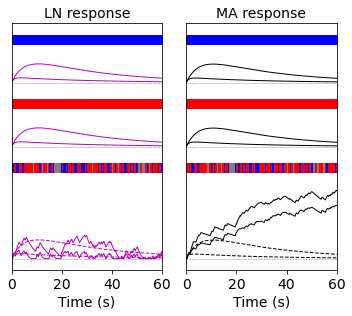

In [8]:
# pure sine
i_s_s = np.ones(len(t))
i_p_s = np.zeros(len(t))

b_s = 0*t
b_s[i_s_s == 1] = 1

# pure pulse
i_s_p = np.zeros(len(t))
i_p_p = np.ones(len(t))

b_p = 0*t
b_p[i_p_p == 1] = 2

# nat song
b_nat = 0*t
b_nat[i_s_nat == 1] = 1
b_nat[i_p_nat == 1] = 2

i_ss = [i_s_s, i_s_p, i_s_nat]
i_ps = [i_p_s, i_p_p, i_s_nat]
bs = [b_s, b_p, b_nat]

rs_lnma = [smlt_lnma(i_s, i_p, params, DT) for i_s, i_p in zip(i_ss, i_ps)]
rs_ma = [smlt_ma(i_s, i_p, params, DT) for i_s, i_p in zip(i_ss, i_ps)]

fig, axs = plt.subplots(1, 2, figsize=(5, 4.5), sharex=True, sharey=True, tight_layout=True)
y_offs = [0, -.2, -.4]
y_gaps = [-.15, -.15, -.3]
for ax, label, color, rs in zip(axs, ['LN', 'MA'], ['m', 'k'], [rs_lnma, rs_ma]):
    for cb, (i_s, i_p, b, rs_, y_off, y_gap) in enumerate(zip(i_ss, i_ps, bs, rs, y_offs, y_gaps)):
        plot_b(ax, t, b, extent=[t[0], t[-1]+DT, y_off-.03, y_off], c=['gray', 'b', 'r'])
        
        ax.axhline(y_off+y_gap, color='gray', ls='--', lw=.5)
        
        ax.plot(t, rs_ + y_off+y_gap, color=color, lw=1)
        
        if cb == 2:
            ax.plot(t, rs[0] + y_off+y_gap, color=color, ls='--', lw=1)
        
    ax.yaxis.set_visible(False)
    set_plot(ax, x_lim=(0, DUR), x_label='Time (s)', title=f'{label} response', font_size=14)
    
fig.savefig('cosyne_2023/2b.svg')